# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [9]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [10]:
#Descargar la pagina
url = "https://companiesmarketcap.com/tesla/revenue/"
data_ = requests.get(url, time.sleep(10)).text
soup = BeautifulSoup(data_,"html.parser")
soup


<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/ico

In [11]:
# Buscar la tabla con los datos de los ingresos
tabla = soup.find("table", class_="table")


In [12]:

datos = []
# Extraer los datos del año y los ingresos
for fila in tabla.find_all("tr")[1:]:  # Saltar el encabezado
    celdas = fila.find_all("td")
    year = celdas[0].text.strip().replace('(TTM)','')
    revenue = celdas[1].text.strip().replace('$', '').replace('B', '').replace(',', '')
    datos.append((year, float(revenue)))

# Crear un DataFrame
df_tesla = pd.DataFrame(datos, columns=["Año", "Revenue (B)"])

print(df_tesla.head())



     Año  Revenue (B)
0  2024         97.15
1   2023        96.77
2   2022        81.46
3   2021        53.82
4   2020        31.53
     Año  Revenue (B)
0  2024         97.15
1   2023        96.77
2   2022        81.46
3   2021        53.82
4   2020        31.53


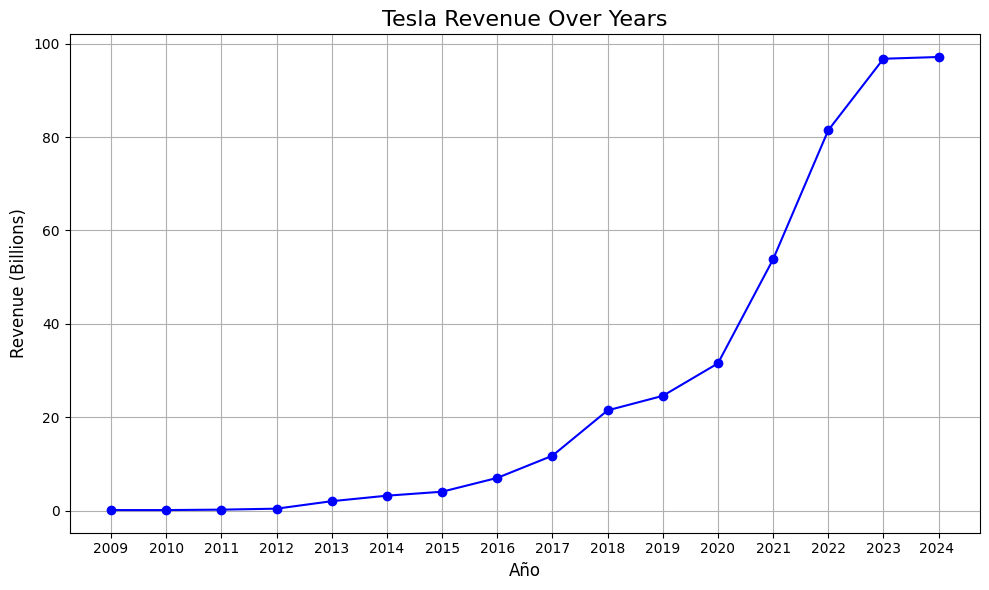

In [16]:
df_tesla_sorted = df_tesla.sort_values(by="Año", ascending=True)
plt.figure(figsize=(10, 6))
plt.plot(df_tesla_sorted["Año"], df_tesla_sorted["Revenue (B)"], marker='o', linestyle='-', color='b', label="Revenue")
plt.title("Tesla Revenue Over Years", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Revenue (Billions)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()